## Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import os
for dirname, _, filenames in os.walk('/Users/anishsoni/Desktop/Machine-Learning/Deep Learning/Covid_19_detection/chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

/Users/anishsoni/Desktop/Machine-Learning/Deep Learning/Covid_19_detection/chest_xray/.DS_Store
/Users/anishsoni/Desktop/Machine-Learning/Deep Learning/Covid_19_detection/chest_xray/test/.DS_Store
/Users/anishsoni/Desktop/Machine-Learning/Deep Learning/Covid_19_detection/chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg
/Users/anishsoni/Desktop/Machine-Learning/Deep Learning/Covid_19_detection/chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg
/Users/anishsoni/Desktop/Machine-Learning/Deep Learning/Covid_19_detection/chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg
/Users/anishsoni/Desktop/Machine-Learning/Deep Learning/Covid_19_detection/chest_xray/test/PNEUMONIA/person124_bacteria_589.jpeg
/Users/anishsoni/Desktop/Machine-Learning/Deep Learning/Covid_19_detection/chest_xray/test/PNEUMONIA/person1647_virus_2848.jpeg
/Users/anishsoni/Desktop/Machine-Learning/Deep Learning/Covid_19_detection/chest_xray/test/PNEUMONIA/person1675_virus_2891.jpeg
/Users/anishsoni/Desktop/Machine

In [4]:
from PIL import Image
# Python Image Library

In [6]:
image1 = Image.open("/Users/anishsoni/Desktop/Machine-Learning/Deep Learning/Covid_19_detection/chest_xray/train/NORMAL/IM-0125-0001.jpeg")
image2 = Image.open("/Users/anishsoni/Desktop/Machine-Learning/Deep Learning/Covid_19_detection/chest_xray/train/NORMAL/IM-0135-0001.jpeg")
image3 = Image.open("/Users/anishsoni/Desktop/Machine-Learning/Deep Learning/Covid_19_detection/chest_xray/train/NORMAL/IM-0145-0001.jpeg")

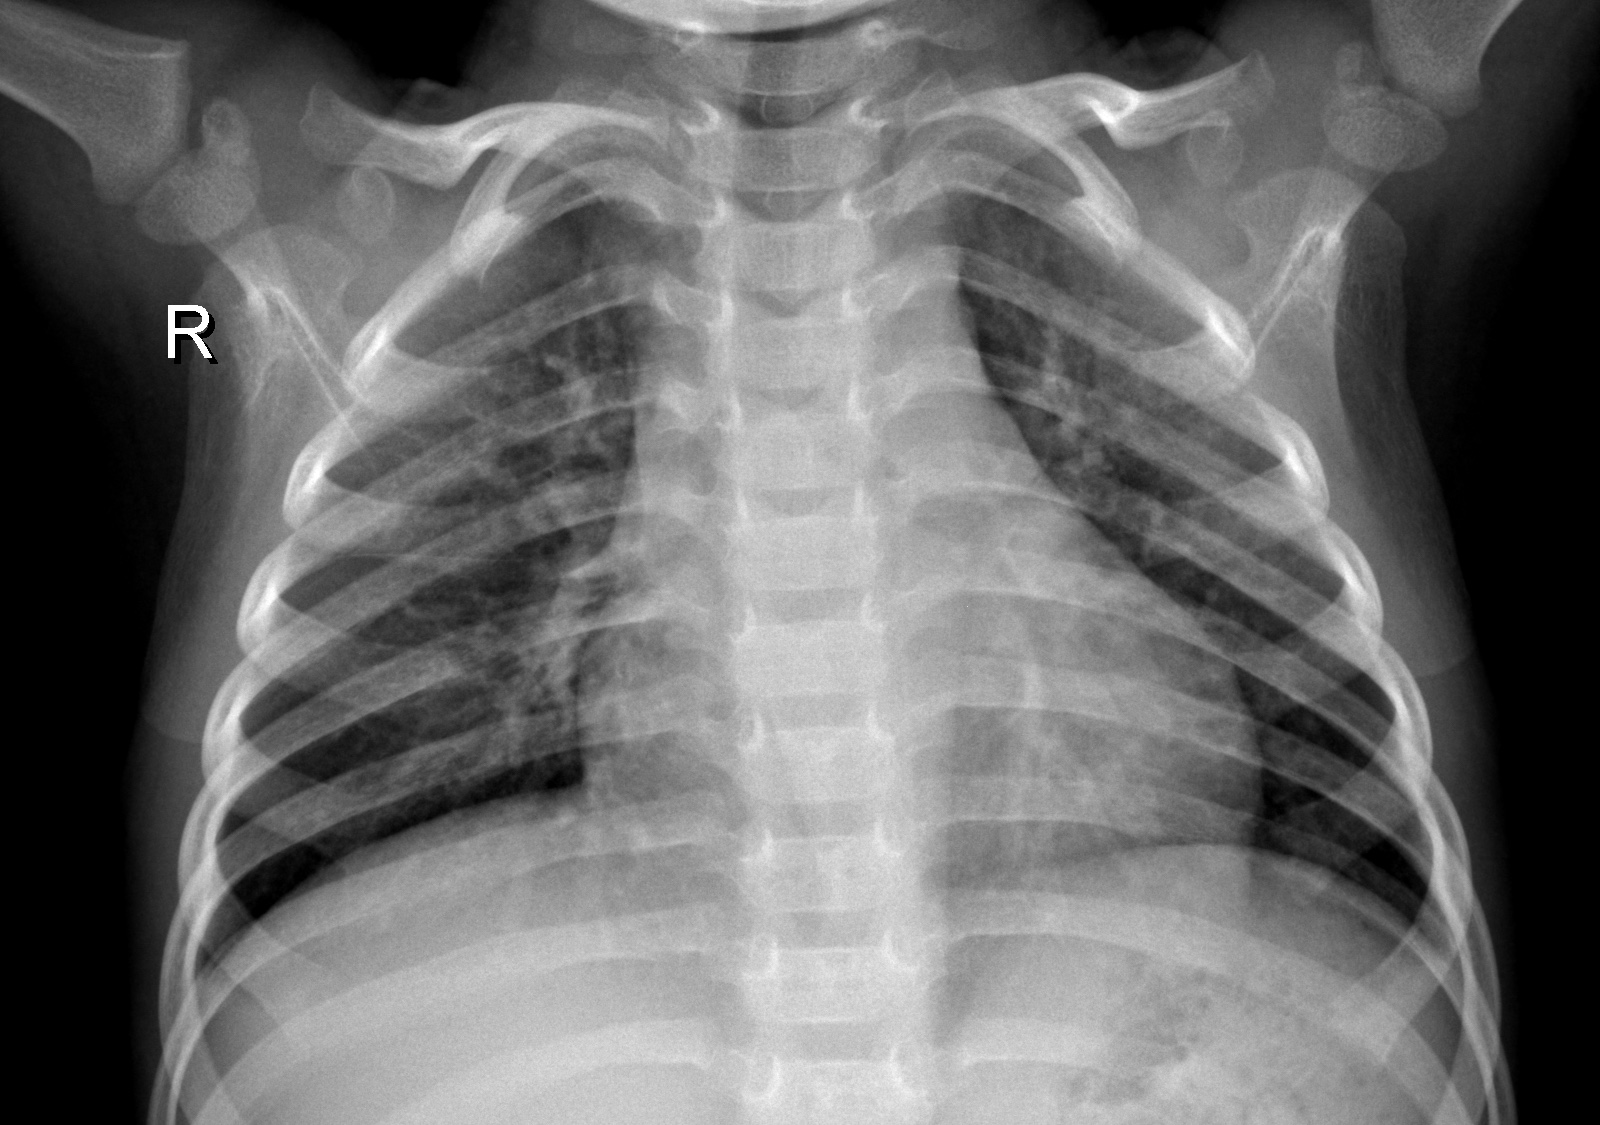

In [7]:
image1

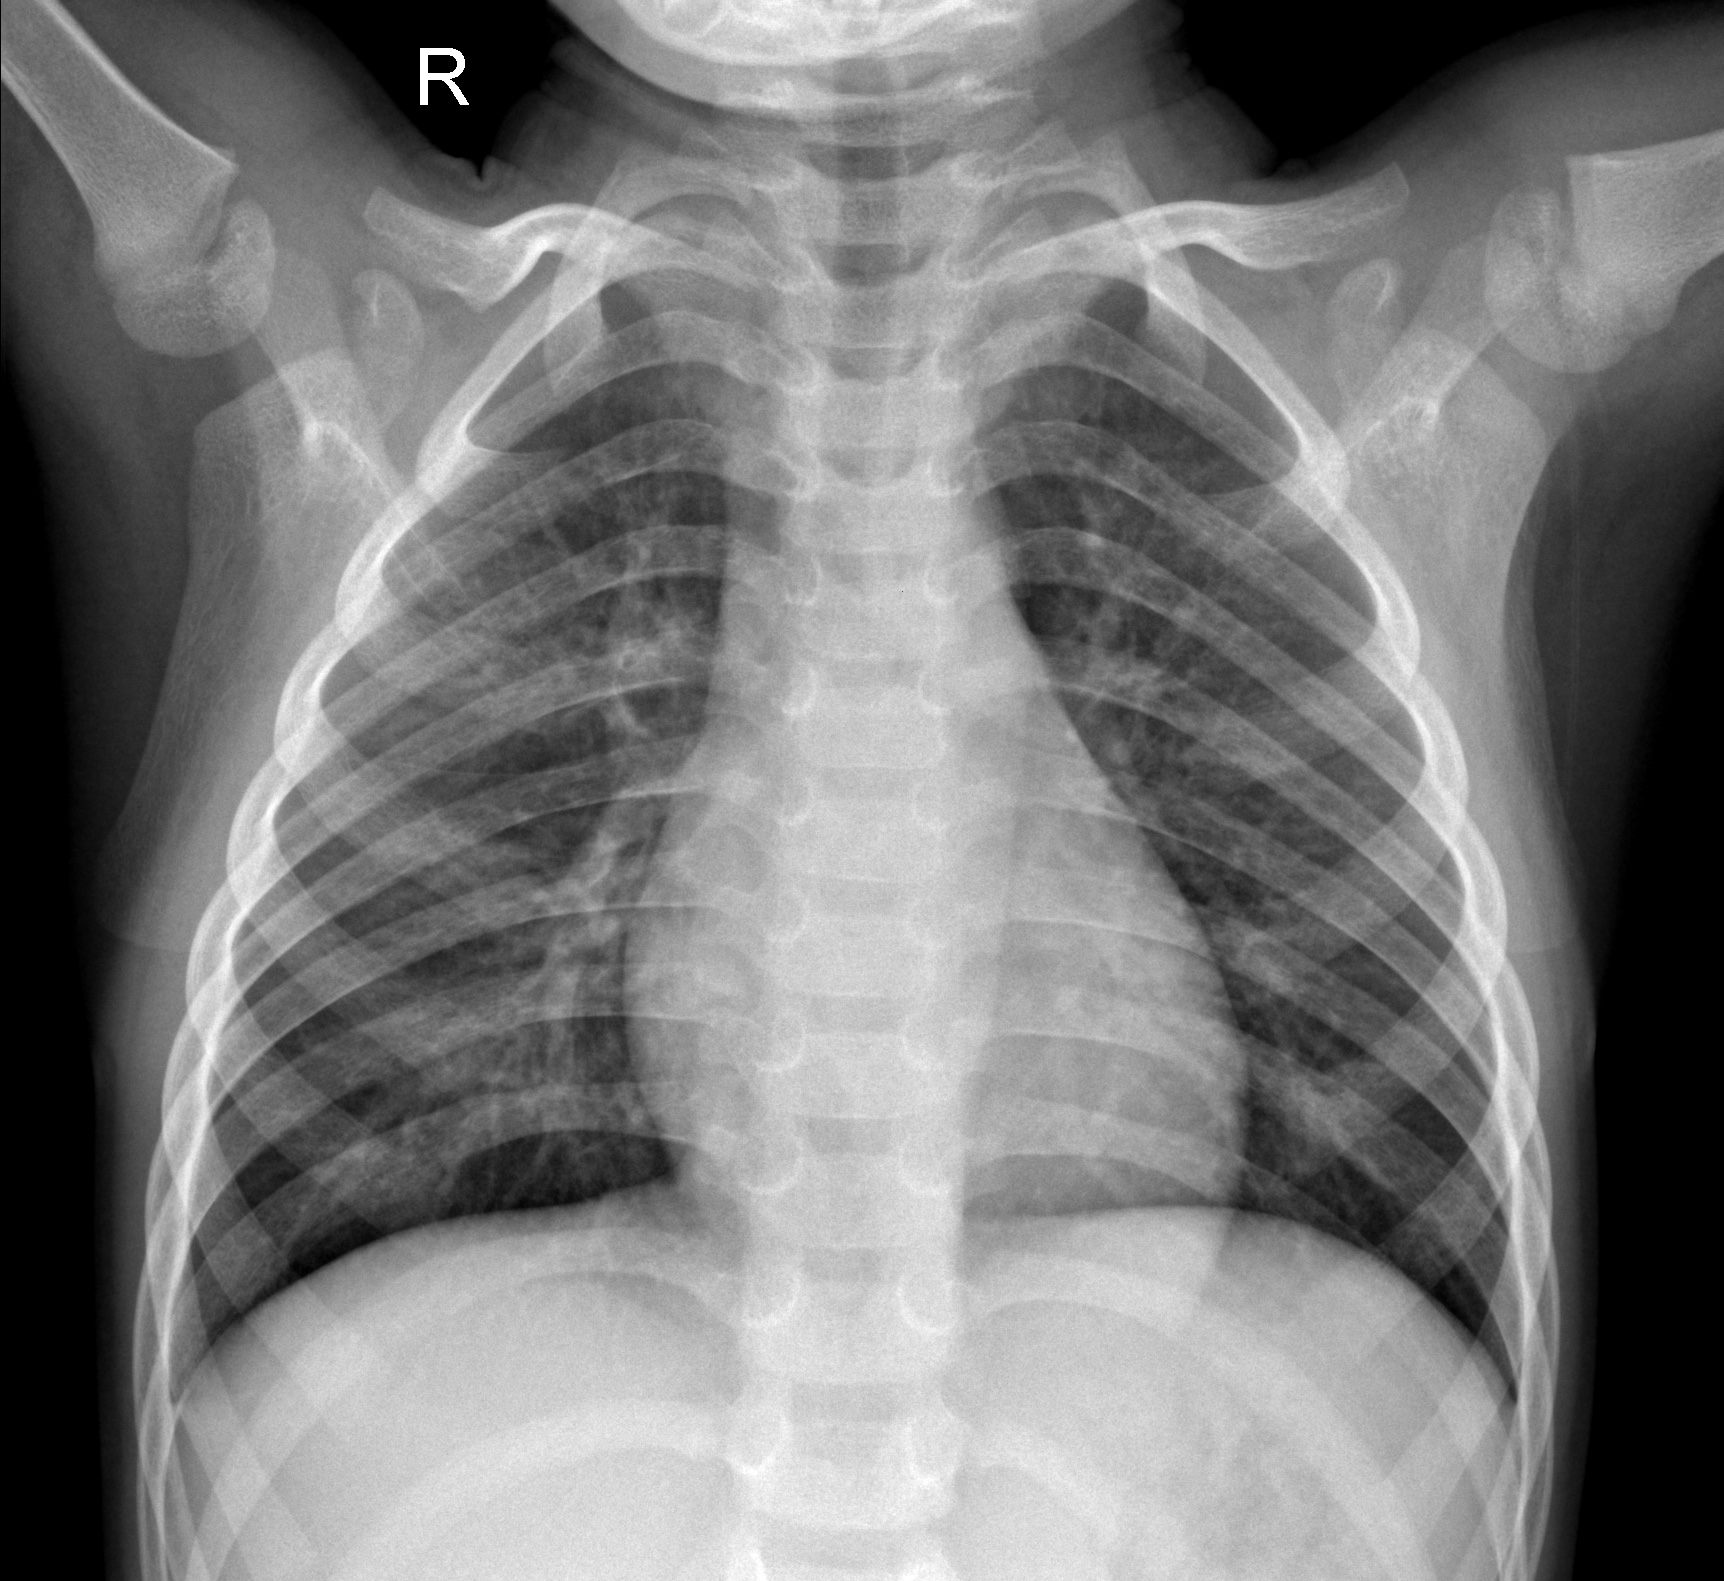

In [8]:
image2

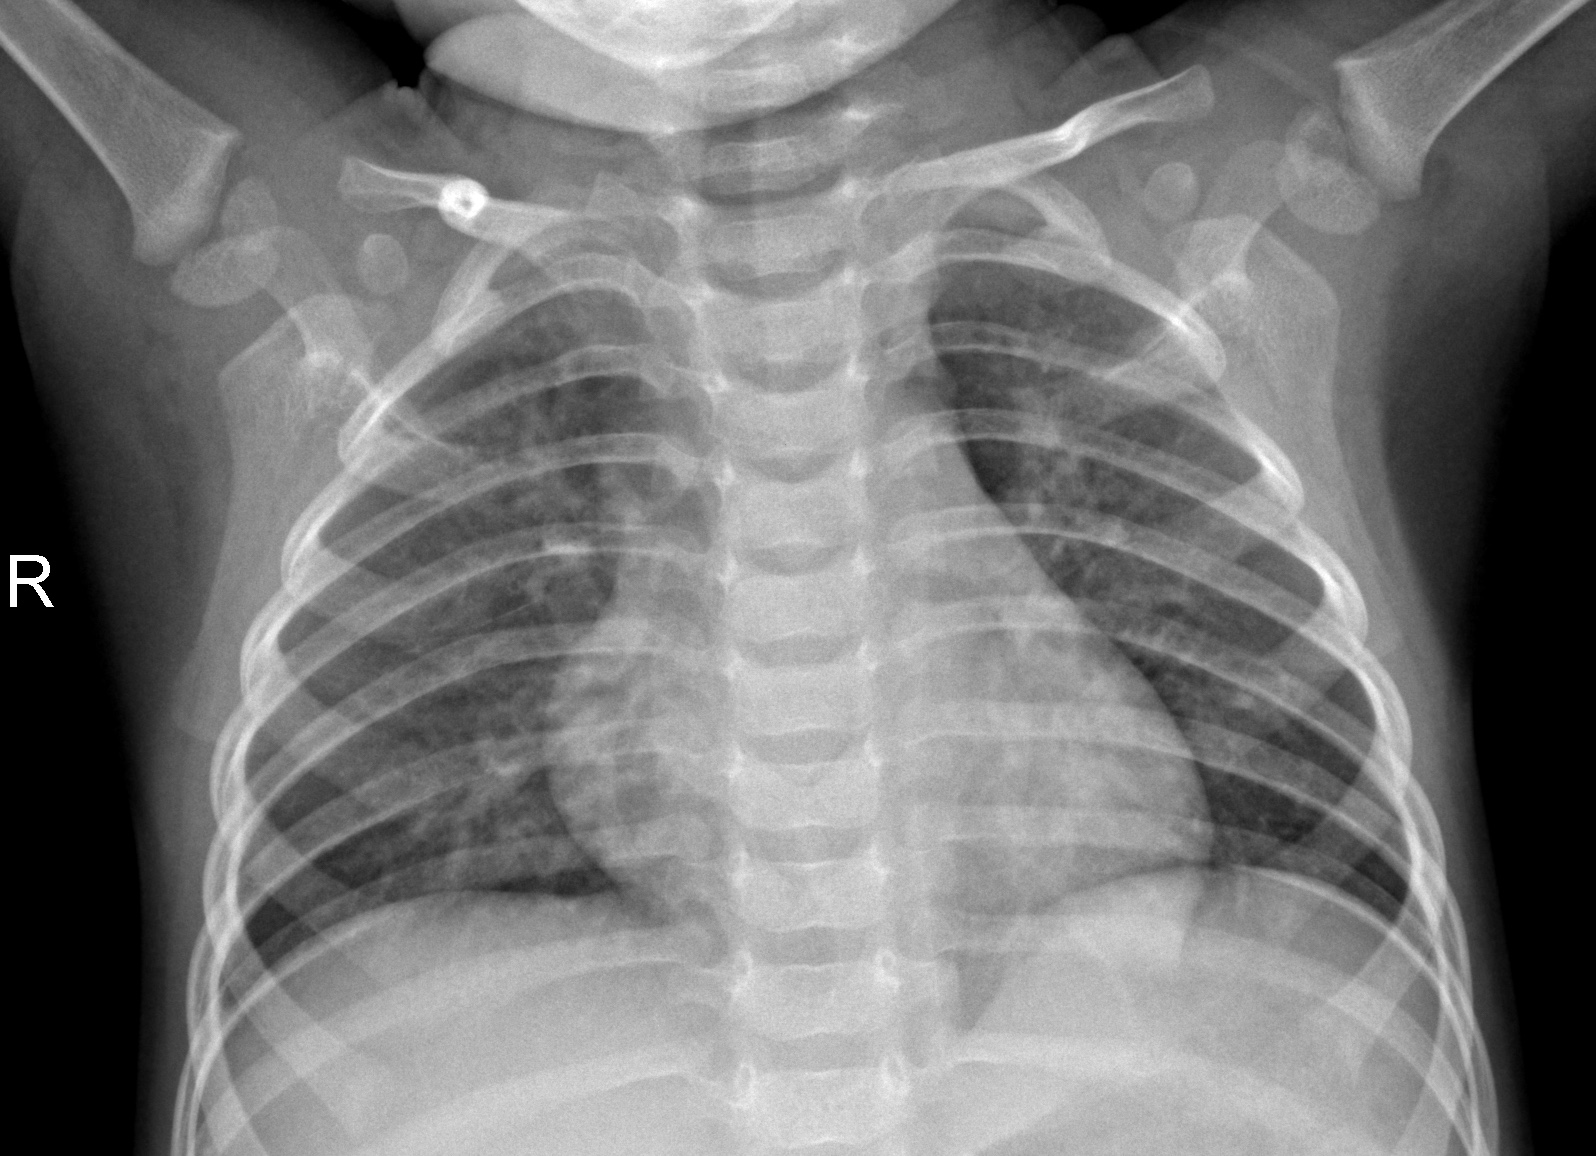

In [9]:
image3

In [10]:
#checking the size of the image
image1.size, image2.size, image3.size

((1600, 1125), (1724, 1581), (1596, 1156))

In [12]:
#printing the main directory
mainDir = os.listdir("/Users/anishsoni/Desktop/Machine-Learning/Deep Learning/Covid_19_detection/chest_xray")
mainDir

['.DS_Store', 'test', 'train', 'val']

In [13]:
#assigning the testing, training, and validation folders
train_folder = '/Users/anishsoni/Desktop/Machine-Learning/Deep Learning/Covid_19_detection/chest_xray/train'
test_folder = '/Users/anishsoni/Desktop/Machine-Learning/Deep Learning/Covid_19_detection/chest_xray/test'
val_folder = '/Users/anishsoni/Desktop/Machine-Learning/Deep Learning/Covid_19_detection/chest_xray/val'

In [18]:
#listing the contents from the folders
os.listdir(train_folder)
train_n = train_folder + 'NORMAL/'
train_p = train_folder + 'PNEUMONIA/'

In [19]:
train_n

'/Users/anishsoni/Desktop/Machine-Learning/Deep Learning/Covid_19_detection/chest_xray/trainNORMAL/'

In [20]:
from pathlib import Path

In [25]:
train_dir = '/Users/anishsoni/Desktop/Machine-Learning/Deep Learning/Covid_19_detection/chest_xray/train'
test_dir = '/Users/anishsoni/Desktop/Machine-Learning/Deep Learning/Covid_19_detection/chest_xray/test'
val_dir = '/Users/anishsoni/Desktop/Machine-Learning/Deep Learning/Covid_19_detection/chest_xray/val'

train_files = list(Path(train_dir).glob("*/*"))
test_files = list(Path(test_dir).glob("*/*"))
val_files = list(Path(val_dir).glob("*/*"))

print(f"Images train set: {len(train_files)}")
print(f"Images test set: {len(test_files)}")
print(f"Images valid set: {len(val_files)}")

Images train set: 5216
Images test set: 624
Images valid set: 16


## Training the model

In [26]:
#using tensorflow
import tensorflow as tf

In [27]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels = "inferred",
    label_mode = "int",
    class_names = None, 
    color_mode='rgb',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,   
)
train_dataset

Found 5216 files belonging to 2 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

test_dataset

Found 624 files belonging to 2 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [29]:
import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, MaxPooling2D, Dropout

## Simple CNN

In [30]:
model = Sequential()
model.add(Conv2D(32, kernel_size  = (3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(32, kernel_size = (3,3), activation ="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation ="relu"))
model.add(Dense(1, activation ="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 flatten (Flatten)           (None, 28800)             0

In [31]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [35]:
history = model.fit(train_dataset, steps_per_epoch = len(train_dataset), epochs = 10, verbose = 1, validation_data = test_dataset, validation_steps=len(test_dataset))

Epoch 1/10
163/163 [==============================] - 47s 284ms/step - loss: 1.8197 - accuracy: 0.8815 - val_loss: 1.0123 - val_accuracy: 0.7516
Epoch 2/10
163/163 [==============================] - 43s 261ms/step - loss: 0.1764 - accuracy: 0.9379 - val_loss: 1.1176 - val_accuracy: 0.7420
Epoch 3/10
163/163 [==============================] - 39s 233ms/step - loss: 0.1286 - accuracy: 0.9540 - val_loss: 1.1731 - val_accuracy: 0.7564
Epoch 4/10
163/163 [==============================] - 37s 224ms/step - loss: 0.1053 - accuracy: 0.9615 - val_loss: 1.4145 - val_accuracy: 0.7308
Epoch 5/10
163/163 [==============================] - 36s 216ms/step - loss: 0.1195 - accuracy: 0.9574 - val_loss: 1.7196 - val_accuracy: 0.7580
Epoch 6/10
163/163 [==============================] - 36s 217ms/step - loss: 0.0813 - accuracy: 0.9711 - val_loss: 1.5770 - val_accuracy: 0.7452
Epoch 7/10
163/163 [==============================] - 35s 213ms/step - loss: 0.1427 - accuracy: 0.9532 - val_loss: 1.5490 - val_ac

## ImageNet

In [36]:
base_model = tf.keras.applications.Xception(input_shape=(128,128,3), include_top = False, weights="imagenet")

83683744/83683744 [==============================] - 14s 0us/step


In [37]:
# Freezing Layers

for layers in base_model.layers[:-5]:
    layers.trainable = False

In [38]:
# Building Model

model=Sequential()
model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 dropout_2 (Dropout)         (None, 4, 4, 2048)        0         
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               8388864   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)              

In [61]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [60]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])        # Adam Optimizer help us to find the largest and the smallest value by using gradient descend 

In [ ]:
history = model.fit(train_dataset, steps_per_epoch= len(train_dataset), epochs = 15, verbose= 1, validation_data = test_dataset, validation_steps = len(test_dataset))

Epoch 1/15
163/163 [==============================] - 171s 1s/step - loss: 0.2739 - accuracy: 0.8999 - val_loss: 0.4879 - val_accuracy: 0.8285
Epoch 2/15
163/163 [==============================] - 185s 1s/step - loss: 0.1771 - accuracy: 0.9360 - val_loss: 1.0195 - val_accuracy: 0.7484
Epoch 3/15
163/163 [==============================] - 210s 1s/step - loss: 0.1687 - accuracy: 0.9383 - val_loss: 0.6619 - val_accuracy: 0.7981
Epoch 4/15
163/163 [==============================] - 179s 1s/step - loss: 0.1490 - accuracy: 0.9442 - val_loss: 0.6978 - val_accuracy: 0.8494
Epoch 5/15
153/163 [===========================>..] - ETA: 10s - loss: 0.1224 - accuracy: 0.9551

## MobileNet V-1

In [ ]:
import tensorflow_hub as hub

In [ ]:
model_hub = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(128,128,3)),
    hub.KerasLayer('/kaggle/input/mobilenet-v1/tensorflow2/075-128-classification/2',
                  trainable=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_hub.build([None, 128, 128, 3])  # Batch input shape.
model_hub.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model_hub, to_file='convnet2.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet2.png'

In [ ]:
model_hub.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])        # Adam Optimizer help us to find the largest and the smallest value by using gradient descend 

In [ ]:
history = model_hub.fit(train_dataset, steps_per_epoch= len(train_dataset), epochs = 15, verbose= 1, validation_data = test_dataset, validation_steps = len(test_dataset))

In [ ]:
model_hub2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(128,128,3)),
    hub.KerasLayer("https://kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/100-128-classification/versions/2",
               trainable=True, arguments=dict(batch_norm_momentum=0.997)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_hub2.build([None, 128, 128, 3])  # Batch input shape.
model_hub2.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model_hub2, to_file='convnet2.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet2.png')

In [ ]:
model_hub2.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])        # Adam Optimizer help us to find the largest and the smallest value by using gradient descend 

In [ ]:
history = model_hub2.fit(train_dataset, steps_per_epoch= len(train_dataset), epochs = 15, verbose= 1, validation_data = test_dataset, validation_steps = len(test_dataset))

## Inception - V3

In [ ]:
model_hub3 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(128,128,3)),
    hub.KerasLayer("https://kaggle.com/models/google/inception-v3/frameworks/TensorFlow2/variations/classification/versions/2",
               trainable=True, arguments=dict(batch_norm_momentum=0.997)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_hub3.build([None, 128, 128, 3])  # Batch input shape.
model_hub3.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model_hub3, to_file='convnet3.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet3.png')

In [ ]:
model_hub3.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
history = model_hub3.fit(train_dataset, steps_per_epoch = len(train_dataset), epochs = 15, verbose = 1, validation_data = test_dataset, validation_steps = len(test_dataset))

## Saving Models